**<h2>Mask R-CNN</h2>**

**Imports**

In [14]:
import os
import sys
import random
import cv2
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

**Config**

In [15]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

**Create Model**

In [16]:
import tensorflow as tf
import keras
import h5py
print(tf.__version__)
print(keras.__version__)
print(h5py.__version__)

1.3.0
2.0.8
2.10.0


In [17]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

**Class Names**

In [18]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

**Object Detection**

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


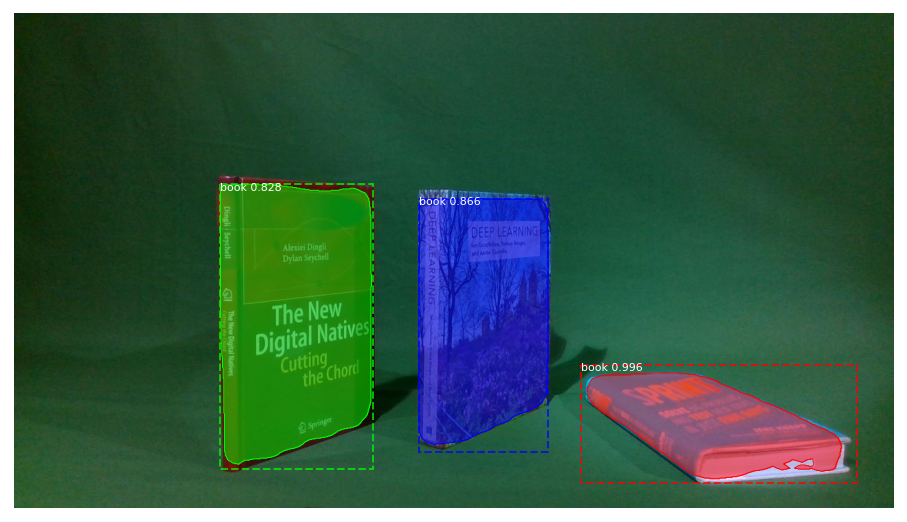

In [19]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

**Display Masks**

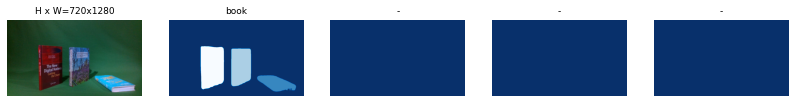

In [20]:
visualize.display_top_masks(image, r['masks'], r['class_ids'], 
                            class_names)

In [21]:
masks = {}

for i in range(len(results[0]['class_ids'])):
    masks[i] = {}
    masks[i]['mask'] = np.array(results[0]['masks'][:, :, i], dtype=np.uint8) * 255

In [22]:
masks

{0: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 1: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 2: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}}

In [23]:
all_masks = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

for i in range(len(results[0]['class_ids'])):
    all_masks += masks[i]['mask']

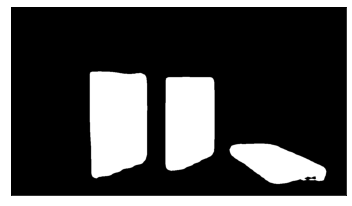

In [24]:
plt.imshow(all_masks, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

**<h2>SaRa</h2>**

In [25]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import saraRC1 as sara

In [26]:
s1 = cv2.imread('./images/3_colour.jpeg')
heatmap, sara_list = sara.return_sara(s1.copy(), 8)

**Mask Ranking**

In [27]:
seg_dim = 8
saliency_maps = {}
sara_heatmaps = {}
sara_lists = {}

In [28]:
generators = ['itti', 'deepgaze', 'fpn', 'emlnet']

for generator in generators:
    saliency_maps[generator] = sara.return_saliency(s1.copy(), generator=generator)
    sara.reset()

    sara_heatmaps[generator], sara_lists[generator] = sara.return_sara(s1.copy(), seg_dim, saliency_map=saliency_maps[generator])
    sara.reset()

Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0


Model loaded emlnet/backbone/res_imagenet.pth
Model loaded emlnet/backbone/res_places.pth
Loaded decoder emlnet/backbone/res_decoder.pth


In [115]:
T = 0.2

In [116]:
def index_to_coordinates(index, seg_dim, im_size):
    '''
    Given an index and a shape, this function returns the corresponding coordinates.
    '''

    x1 = int((index % seg_dim) * (im_size[1] / seg_dim))
    y1 = int((index // seg_dim) * (im_size[0] / seg_dim))

    x2 = int(x1 + (im_size[1] / seg_dim))
    y2 = int(y1 + (im_size[0] / seg_dim))
    
    return (x1, y1, x2, y2)

In [126]:
# For each segment, check which mask falls under that segment using MRn = rank(Gi); (Gi interesect Mn) > T
mask_segments = {}
seg_dim = 8

for sara_list in sara_lists:
    for segment in sara_lists[sara_list]:
        if sara_list not in mask_segments:
            mask_segments[sara_list] = {}

        # Convert index to coordinates, extract segment from heatmap
        x1, y1, x2, y2 = index_to_coordinates(segment[5], seg_dim, s1.shape)

        for m in masks:
            if m not in mask_segments[sara_list]:
                mask_segments[sara_list][m] = []

            # Extract mask from masks
            mask = masks[m]['mask'][y1:y2, x1:x2]

            # Calculate intersection over union
            intersection = np.sum(mask > 0)
            union = np.sum(mask > 0) + np.sum(mask == 0)

            iou = intersection / union

            print('Segment: ', segment[5], 'Mask: ', m, 'IoU: ', iou)

            if iou > T:
                # index, rank, saliency
                print('HERE')
                print(segment)
                mask_segments[sara_list][m].append((segment[5], segment[0], segment[1]))
                print(mask_segments)

Segment:  63 Mask:  0 IoU:  0.169375
Segment:  63 Mask:  1 IoU:  0.0
Segment:  63 Mask:  2 IoU:  0.0
Segment:  62 Mask:  0 IoU:  0.4392361111111111
HERE
(13, 2279.016976465013, 2277.259118181758, 0.7578582832551991, 1, 62, 4)
{'itti': {0: [(62, 13, 2279.016976465013)], 1: [], 2: []}}
Segment:  62 Mask:  1 IoU:  0.0
Segment:  62 Mask:  2 IoU:  0.0
Segment:  61 Mask:  0 IoU:  0.023541666666666666
Segment:  61 Mask:  1 IoU:  0.0
Segment:  61 Mask:  2 IoU:  0.0
Segment:  60 Mask:  0 IoU:  0.0
Segment:  60 Mask:  1 IoU:  0.0
Segment:  60 Mask:  2 IoU:  0.0
Segment:  59 Mask:  0 IoU:  0.0
Segment:  59 Mask:  1 IoU:  0.0
Segment:  59 Mask:  2 IoU:  0.0
Segment:  58 Mask:  0 IoU:  0.0
Segment:  58 Mask:  1 IoU:  0.0
Segment:  58 Mask:  2 IoU:  0.10118055555555555
Segment:  57 Mask:  0 IoU:  0.0
Segment:  57 Mask:  1 IoU:  0.0
Segment:  57 Mask:  2 IoU:  0.018194444444444444
Segment:  56 Mask:  0 IoU:  0.0
Segment:  56 Mask:  1 IoU:  0.0
Segment:  56 Mask:  2 IoU:  0.0
Segment:  55 Mask:  0 IoU

In [127]:
mask_segments

{'itti': {0: [(62, 13, 2279.016976465013),
   (54, 22, 66685.73707559738),
   (53, 32, 82541.932916848)],
  1: [(52, 12, 83397.94971623605),
   (51, 48, 123645.2909552194),
   (44, 11, 1705382.9069803315),
   (43, 10, 2070974.6520666427),
   (36, 60, 392478929.54889935),
   (35, 31, 2978391194041.874),
   (28, 63, 7.519502857286246e+25),
   (27, 52, 1.037251893076078e+27)],
  2: [(50, 15, 179661.9895797627),
   (43, 10, 2070974.6520666427),
   (42, 2, 2425645.964085314),
   (35, 31, 2978391194041.874),
   (34, 37, 82656752917889.44),
   (27, 52, 1.037251893076078e+27),
   (26, 44, 1.5923215527034366e+30)]},
 'deepgaze': {0: [(62, 1, 656.8981103456949),
   (54, 11, 9746202.104989976),
   (53, 24, 12604417.20497569)],
  1: [(52, 21, 17484582.703576762),
   (51, 38, 19596630.41789704),
   (44, 31, 250334512.42015013),
   (43, 12, 279562321.8265704),
   (36, 2, 2533268996123.54),
   (35, 3, 295088879692766.75),
   (28, 29, 6.307051016819124e+20),
   (27, 62, 1.0083706688716627e+22)],
  2: 

In [128]:
# For each mask, find the segment with the lowest rank
mask_segments_min = {}

for sara_list in mask_segments:
    for m in mask_segments[sara_list]:
        # mask_segments_min[sara_list][m] = min(mask_segments[sara_list][m], key=lambda x: x[1])[0]
        if sara_list not in mask_segments_min:
            mask_segments_min[sara_list] = {}
        
        mask_segments_min[sara_list][m] = min(mask_segments[sara_list][m], key=lambda x: x[1])

mask_segments_min

{'itti': {0: (62, 13, 2279.016976465013),
  1: (43, 10, 2070974.6520666427),
  2: (42, 2, 2425645.964085314)},
 'deepgaze': {0: (62, 1, 656.8981103456949),
  1: (36, 2, 2533268996123.54),
  2: (42, 0, 466743141.0380552)},
 'fpn': {0: (62, 7, 1.5),
  1: (52, 8, 1.7471969351024026),
  2: (43, 11, 1.9409120377223181)},
 'emlnet': {0: (53, 15, 1.6070974421975235),
  1: (52, 9, 1.6070974421975235),
  2: (42, 10, 1.6973718331752026)}}

In [109]:
[rank for rank in sorted(mask_segments_min['deepgaze'].values())]

[(36, 2, 2533268996123.54, 2533268996121.966, 0.5743491774985175),
 (42, 0, 466743141.0380552, 466743139.6262597, 0.41179550863378656),
 (54, 11, 9746202.104989976, 9746200.347131692, 0.7578582832551991)]

In [48]:
mask_segments_min

{'itti': {0: 54, 1: 44, 2: 42},
 'deepgaze': {0: 54, 1: 36, 2: 42},
 'fpn': {0: 54, 1: 44, 2: 50},
 'emlnet': {0: 54, 1: 44, 2: 42}}

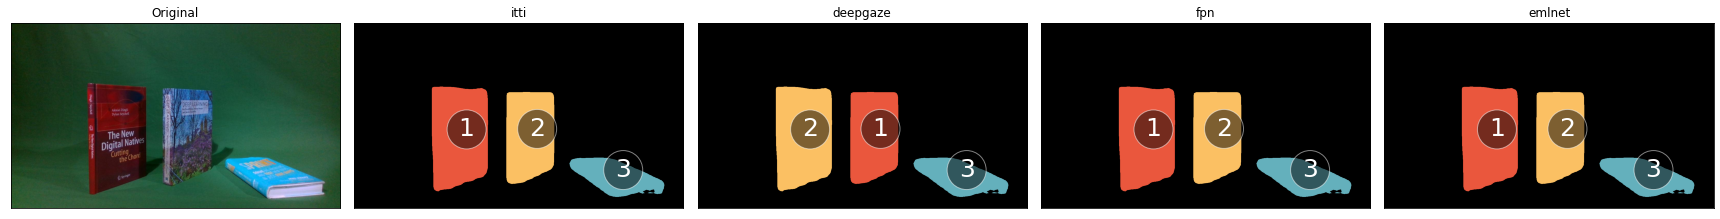

In [136]:
# Display masks with lowest rank
plt.rcParams['figure.figsize'] = [24, 12]
fig = plt.figure()
# plt.imshow(all_masks)
plt.imshow(cv2.cvtColor(s1, cv2.COLOR_BGR2RGB))

plt.subplot(1, len(mask_segments_min) + 1, 1)
plt.imshow(cv2.cvtColor(s1, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])

all_ranks = {}

for i, sara_list in enumerate(mask_segments_min):
    plt.subplot(1, len(mask_segments_min) + 1, i + 2)
    # plt.imshow(cv2.cvtColor(s1, cv2.COLOR_BGR2RGB))
    black = np.zeros((s1.shape[0], s1.shape[1]), dtype=np.uint8)
    plt.imshow(black, cmap='gray')
    plt.title(sara_list)
    plt.xticks([])
    plt.yticks([])

    sorted_ranks = [[mask, rank] for mask, rank in sorted(mask_segments_min[sara_list].items(), key=lambda x: x[1])]
    sorted_ranks = {mask:rank for mask, rank in sorted_ranks}

    all_ranks[sara_list] = sorted_ranks

    colours = [(234, 87, 61), (251, 192, 99), (100, 176, 188), (68, 102, 153), (85, 85, 119)]


    for i, rank in enumerate(sorted_ranks):
        mask = masks[rank]['mask']

        # Get center of white area
        y, x = np.where(mask > 0)
        y = int(np.mean(y))
        x = int(np.mean(x))


        t = plt.text(x, y, str(i + 1), color='white', fontsize=25)
        t.set_bbox(dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='circle'))

        # show mask with corresponding colour, do not show black parts, make transparent
        alpha_mask = np.zeros((mask.shape[0], mask.shape[1], 4))
        alpha_mask[mask > 0] = colours[i] + (255,)
        alpha_mask[mask == 0] = (0, 0, 0, 0)

        alpha_mask = np.clip(alpha_mask, 0, 255).astype(np.uint8)

        plt.imshow(alpha_mask, alpha=1)

        # Save mask
        alpha_mask = cv2.cvtColor(alpha_mask, cv2.COLOR_RGBA2BGRA)
        cv2.imwrite('./masks/' + sara_list + '/mask_fill_' + str(i) + '.png', alpha_mask)

        # Convert to contours
        blank = np.zeros((alpha_mask.shape[0], alpha_mask.shape[1], 3), dtype=np.uint8)
        alpha_mask = cv2.cvtColor(alpha_mask, cv2.COLOR_BGRA2GRAY)
        contours, hierarchy = cv2.findContours(alpha_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(blank, contours, -1, colours[i], 3)
        blank = cv2.cvtColor(blank, cv2.COLOR_BGR2RGBA)
        # Make black parts transparent
        blank[blank[:, :, 0] == 0] = (0, 0, 0, 0)
        
        cv2.imwrite('./masks/' + sara_list + '/mask_' + str(i) + '.png', blank)


fig.patch.set_facecolor('white')
fig.tight_layout()
plt.show()

In [52]:
mask_segments_min

{'itti': {0: 54, 1: 44, 2: 42},
 'deepgaze': {0: 54, 1: 36, 2: 42},
 'fpn': {0: 54, 1: 44, 2: 50},
 'emlnet': {0: 54, 1: 44, 2: 42}}

In [36]:
def SOR(sm, gt):
    '''
    This function calculates the SOR score for a given saliency map and ground truth.
    '''

    # Convert to binary
    sm = sm > 0
    gt = gt > 0

    # Calculate intersection over union
    intersection = np.sum(sm * gt)
    union = np.sum(sm) + np.sum(gt)

    iou = intersection / union

    return iou

In [138]:
import pygame
import sys
import cv2
import numpy as np

def create_interactive_plot(input_image, mask_segments_min, heatmaps, sara_lists):
    try:
        pygame.init()

        # Icon
        icon = pygame.image.load('./output/heatmap.png')
        pygame.display.set_icon(icon)

        WIDTH = 1280
        HEIGHT = 720

        # Set the dimensions of the window
        original = cv2.resize(input_image, (WIDTH, HEIGHT))
        original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

        # original_heatmap = cv2.resize(heatmap, (WIDTH, HEIGHT))


        screen_width = WIDTH
        screen_height = HEIGHT

        screen = pygame.display.set_mode((screen_width, screen_height))

        # Window title
        pygame.display.set_caption("SaRa Ranking")

        # main_image = pygame.image.load('./output/original.png').convert_alpha()
        main_image = pygame.surfarray.make_surface(original.swapaxes(0, 1))
        # main_image_heatmap = pygame.surfarray.make_surface(original_heatmap.swapaxes(0, 1))


        hovered_mask = None

        font = pygame.font.Font(None, 24)  # Create a font for displaying text

        running = True

        show_heatmap = False
        show_masks = False

        do_itti = True
        do_deepgaze = False
        do_fpn = False
        do_emlnet = False

        heatmap_index = 'itti'

        legend_font = pygame.font.Font(None, 32)  # Font for the legend

        while running:
            mask_imgs = []
            mask_fill_imgs = []

            for i in range(3):
                mask_imgs.append(pygame.image.load('./masks/' + heatmap_index + '/mask_' + str(i) + '.png'))
                mask_imgs[i] = pygame.transform.scale(mask_imgs[i], (screen_width, screen_height))

                mask_fill_imgs.append(pygame.image.load('./masks/' + heatmap_index + '/mask_fill_' + str(i) + '.png'))
                mask_fill_imgs[i] = pygame.transform.scale(mask_fill_imgs[i], (screen_width, screen_height))

                # mask_fill_imgs.append(pygame.image.load('./output/mask_fill' + str(i) + '.png'))
                # mask_fill_imgs[i] = pygame.transform.scale(mask_fill_imgs[i], (screen_width, screen_height))

            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    running = False
                    pygame.display.quit()
                elif event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_h:  # Listen for the spacebar key press
                        show_heatmap = not show_heatmap  # Toggle the show_heatmap state
                    elif event.key == pygame.K_m:
                        show_masks = not show_masks
                    elif event.key == pygame.K_q:
                        running = False
                        pygame.display.quit()
                    elif event.key == pygame.K_ESCAPE:
                        running = False
                        pygame.display.quit()
                    elif event.key == pygame.K_1:
                        do_itti = True
                        do_deepgaze = False
                        do_fpn = False
                        do_emlnet = False
                        heatmap_index = 'itti'
                    elif event.key == pygame.K_2:
                        do_deepgaze = True
                        do_itti = False
                        do_fpn = False
                        do_emlnet = False
                        heatmap_index = 'deepgaze'
                    elif event.key == pygame.K_3:
                        do_fpn = True
                        do_itti = False
                        do_deepgaze = False
                        do_emlnet = False
                        heatmap_index = 'fpn'
                    elif event.key == pygame.K_4:
                        do_emlnet = True
                        do_itti = False
                        do_deepgaze = False
                        do_fpn = False
                        heatmap_index = 'emlnet'
                    
            screen.fill((0, 0, 0))  # Fill the screen with black
            screen.blit(main_image, (0, 0))

            # Blit main image and masks onto the screen
            if show_heatmap:
                if do_itti:
                    heatmap = heatmaps['itti']
                elif do_deepgaze:
                    heatmap = heatmaps['deepgaze']
                elif do_fpn:
                    heatmap = heatmaps['fpn']
                elif do_emlnet:
                    heatmap = heatmaps['emlnet']

                heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
                heatmap = pygame.surfarray.make_surface(heatmap.swapaxes(0, 1))
                screen.blit(heatmap, (0, 0))

                # screen.blit(main_image_heatmap, (0, 0))
            # else:

            if show_masks:
                for mask in mask_imgs:
                    # screen.blit(mask, (0, 0), special_flags=pygame.BLEND_RGBA_ADD)
                    screen.blit(mask, (0, 0))

                    # Show mask except black parts

            legend_text_heatmap = legend_font.render("H: Toggle Heatmap", True, (255, 255, 255))
            legend_text_masks = legend_font.render("M: Toggle Masks", True, (255, 255, 255))
            legend_text_itti = legend_font.render("1: Itti", True, (255, 255, 255))
            legend_text_deepgaze = legend_font.render("2: Deepgaze", True, (255, 255, 255))
            legend_text_fpn = legend_font.render("3: FPN", True, (255, 255, 255))
            legend_text_emlnet = legend_font.render("4: EMLNet", True, (255, 255, 255))

            legend_width = max(legend_text_heatmap.get_width(), legend_text_masks.get_width())
            legend_height = legend_text_heatmap.get_height() + legend_text_masks.get_height() + legend_text_itti.get_height() + legend_text_deepgaze.get_height() + legend_text_fpn.get_height() + legend_text_emlnet.get_height()

            legend_bg = pygame.Surface((legend_width + 20, legend_height + 10))
            legend_bg.set_alpha(128)  # Set the alpha value to make it transparent
            legend_bg.fill((0, 0, 0))
            screen.blit(legend_bg, (screen_width - legend_bg.get_width(), 10))

            # screen.blit(legend_text_heatmap, (screen_width - legend_text_heatmap.get_width() - 10, 15))
            # screen.blit(legend_text_masks, (screen_width - legend_text_masks.get_width() - 10, 15 + legend_text_heatmap.get_height()))
            # screen.blit(legend_text_itti, (screen_width - legend_text_itti.get_width() - 10, 15 + legend_text_heatmap.get_height() + legend_text_masks.get_height()))
            # screen.blit(legend_text_deepgaze, (screen_width - legend_text_deepgaze.get_width() - 10, 15 + legend_text_heatmap.get_height() + legend_text_masks.get_height() + legend_text_itti.get_height()))
            # screen.blit(legend_text_fpn, (screen_width - legend_text_fpn.get_width() - 10, 15 + legend_text_heatmap.get_height() + legend_text_masks.get_height() + legend_text_itti.get_height() + legend_text_deepgaze.get_height()))
            # screen.blit(legend_text_emlnet, (screen_width - legend_text_emlnet.get_width() - 10, 15 + legend_text_heatmap.get_height() + legend_text_masks.get_height() + legend_text_itti.get_height() + legend_text_deepgaze.get_height() + legend_text_fpn.get_height()))

            # LEFT ALIGN
            screen.blit(legend_text_heatmap, (screen_width - legend_width - 10, 15))
            screen.blit(legend_text_masks, (screen_width - legend_width - 10, 15 + legend_text_heatmap.get_height()))
            screen.blit(legend_text_itti, (screen_width - legend_width - 10, 15 + legend_text_heatmap.get_height() + legend_text_masks.get_height()))
            screen.blit(legend_text_deepgaze, (screen_width - legend_width - 10, 15 + legend_text_heatmap.get_height() + legend_text_masks.get_height() + legend_text_itti.get_height()))
            screen.blit(legend_text_fpn, (screen_width - legend_width - 10, 15 + legend_text_heatmap.get_height() + legend_text_masks.get_height() + legend_text_itti.get_height() + legend_text_deepgaze.get_height()))
            screen.blit(legend_text_emlnet, (screen_width - legend_width - 10, 15 + legend_text_heatmap.get_height() + legend_text_masks.get_height() + legend_text_itti.get_height() + legend_text_deepgaze.get_height() + legend_text_fpn.get_height()))



            # for mask in mask_imgs:
            #     screen.blit(mask, (0, 0), special_flags=pygame.BLEND_RGBA_ADD)

            # Inside the main loop
            mouse_x, mouse_y = pygame.mouse.get_pos()

            # Check if the mouse is hovering over a mask
            for i in range(len(mask_fill_imgs)):
                # check if mouse is hovering over mask i's non-black pixels
                if mask_fill_imgs[i].get_at((mouse_x, mouse_y)) != (0, 0, 0, 0):
                    hovered_mask = i
                    break
                else:
                    hovered_mask = None

            # Display the hovered mask's index
            if hovered_mask is not None:
                # black background, white font, display object index and rank
                title_text = font.render("Object " + str(hovered_mask + 1), True, (255, 255, 255))
                
                # info = mask_segments_min[hovered_mask]
                info = mask_segments_min[heatmap_index][hovered_mask]
                index = info[0]
                rank = info[1]
                # iou = np.round(info[1], 2)
                score = np.round(info[2], 2)

                rank_text = font.render("Rank: " + str(rank), True, (255, 255, 255))
                # iou_text = font.render("IoU: " + str(iou), True, (255, 255, 255))
                score_text = font.render("Score: " + str(score), True, (255, 255, 255))

                width = score_text.get_width()
                # height = title_text.get_height() + rank_text.get_height() + iou_text.get_height() + entropy_text.get_height()
                height = title_text.get_height() + rank_text.get_height() + score_text.get_height()

                bg = pygame.Surface((width, height))

                bg.fill((16, 16, 16))

                inc = 10
                
                # Blit the text onto the background
                screen.blit(bg, (mouse_x + inc, mouse_y - inc))
                screen.blit(title_text, (mouse_x + inc, mouse_y - inc))
                screen.blit(rank_text, (mouse_x + inc, mouse_y - inc + title_text.get_height()))
                # screen.blit(iou_text, (mouse_x + inc, mouse_y - inc + title_text.get_height() + rank_text.get_height()))
                screen.blit(score_text, (mouse_x + inc, mouse_y - inc + title_text.get_height() + rank_text.get_height()))
            
            # Allow zooming
            if pygame.mouse.get_pressed()[0]:
                mouse_x, mouse_y = pygame.mouse.get_pos()

                if mouse_x < screen_width and mouse_y < screen_height:
                    zoom_rect = pygame.Rect(mouse_x - 50, mouse_y - 50, 100, 100)

                    zoomed_image = pygame.Surface((100, 100))
                    zoomed_image.blit(main_image, (0, 0), zoom_rect)

                    zoomed_image = pygame.transform.scale(zoomed_image, (400, 400))

                    screen.blit(zoomed_image, (0, 0))
                    
            pygame.display.flip()  # Update the display

            

    except SystemExit:
        print("Exiting...")
        pygame.quit()
        sys.exit()


create_interactive_plot(s1, mask_segments_min, sara_heatmaps, sara_lists)

error: display Surface quit

In [100]:
sara_lists

{'itti': [(24,
   1984.1300726761556,
   1982.5059074017047,
   0.6241652744508059,
   1,
   63,
   4),
  (13, 2279.016976465013, 2277.259118181758, 0.7578582832551991, 1, 62, 4),
  (30, 4153.124651503273, 4151.2541009399765, 0.8705505632961241, 1, 61, 4),
  (4, 6798.7169357949315, 6797.07522284615, 0.6417129487814521, 1, 60, 4),
  (56, 7767.302910275766, 7765.802910275766, 0.5, 1, 59, 4),
  (14, 7975.2865491764305, 7973.589177343255, 0.6973718331752027, 1, 58, 4),
  (7, 16312.161978398959, 16310.661978398959, 0.5, 1, 57, 4),
  (6, 17957.683198386047, 17956.108849208547, 0.5743491774985175, 1, 56, 4),
  (5, 60913.13814881841, 60911.51398354396, 0.6241652744508059, 1, 55, 4),
  (22, 66685.73707559738, 66683.93600571979, 0.8010698775896221, 1, 54, 4),
  (32, 82541.932916848, 82540.29120389922, 0.6417129487814521, 1, 53, 4),
  (12, 83397.94971623605, 83396.1705516564, 0.7791645796604999, 1, 52, 4),
  (48, 123645.2909552194, 123643.71660604191, 0.5743491774985175, 1, 51, 4),
  (15, 179661.